In [3]:
import numpy as np
import pandas as pd

# Series

In [4]:
studs = pd.Series(['Bob', 'Mary', 'Joe', 'Will', 'Bob', 'Anne'], 
                         index = ['f', 'e', 'c', 'd', 'a', 'b'])

In [5]:
# Integer-location based indexing
studs.iloc[1:3] # or studs[1:3]

e    Mary
c     Joe
dtype: object

In [6]:
# Boolean indexing
studs.loc[studs == 'Bob'] # or studs[studs == 'Bob']

f    Bob
a    Bob
dtype: object

In [7]:
# Label indexing
studs.loc[['e', 'c', 'd']] # or studs[['e', 'c', d']]

e    Mary
c     Joe
d    Will
dtype: object

In [8]:
studs.loc['e':'d'] # or studs['e':'d']

e    Mary
c     Joe
d    Will
dtype: object

# DataFrame

## DataFrame construction

In [9]:
# Specify values for each column
df = pd.DataFrame({
        "CS101": [10, 5, 8],
        "CS102": [8, 7, 8],
        "CS103": [9, 10, 9],
        "CS104": [5, 7, 6]
    },
    index = ['Bob', 'Mary', 'Anne'])
df 

,CS101,CS102,CS103,CS104
Bob,10,8,9,5
Mary,5,7,10,7
Anne,8,8,9,6


In [10]:
# Specify values for each row
data = [[10, 8, 9, 5], [5, 7, 10, 7], [8, 8, 9, 6]]
df = pd.DataFrame(data, 
                  index = ['Bob', 'Mary', 'Anne'], 
                  columns = ['CS101', 'CS102', 'CS103', 'CS104'])
df.index.name = 'Student'
df.columns.name = 'Course'
df

Course,CS101,CS102,CS103,CS104
Student,,,,
Bob,10,8,9,5
Mary,5,7,10,7
Anne,8,8,9,6


In [11]:
# Specify values for each row with Hierarchical Indexing
data = [[10, 8, 9, 5], [5, 7, 10, 7], [8, 8, 9, 6]]
# Column MultiIndex
columnIdx = pd.MultiIndex.from_tuples([('CS', 'CS101'), ('CS', 'CS102'), ('ST', 'CS103'), ('ST', 'CS104')])
columnIdx.names = ['Dept', 'Course']
# Row MultiIndex
rowIdx = pd.MultiIndex.from_tuples([('Postgrad', 'Bob'), ('Postgrad', 'Mary'), ('Undergrad', 'Anne')])
rowIdx.names = ['Level', 'Student']
# Create dataframe
df = pd.DataFrame(data, index = rowIdx, columns = columnIdx)
df

Dept                 CS          ST      
Course            CS101 CS102 CS103 CS104
Level     Student                        
Postgrad  Bob        10     8     9     5
          Mary        5     7    10     7
Undergrad Anne        8     8     9     6

## DataFrame indexing

In [12]:
df = pd.DataFrame(np.random.randint(5, 10, (4, 5)), 
    index = pd.Index(['Bob', 'Mary', 'Joe', 'Will'],name='students'), 
    columns = pd.Index(['CS101', 'CS102', 'CS103', 'CS104', 'CS105'], 
                       name='courses'))
df

courses,CS101,CS102,CS103,CS104,CS105
students,,,,,
Bob,8,5,7,8,5
Mary,7,6,9,9,7
Joe,8,8,6,7,8
Will,9,9,5,8,5


In [13]:
# Select specific columns by name
df[['CS102', 'CS105']] # or df.loc[:, ['CS102', 'CS105']]

courses,CS102,CS105
students,,
Bob,5,5
Mary,6,7
Joe,8,8
Will,9,5


In [14]:
# Shorthand syntax for row indexing
df[0:2] # or df[:2]

courses,CS101,CS102,CS103,CS104,CS105
students,,,,,
Bob,8,5,7,8,5
Mary,7,6,9,9,7


In [15]:
# Label-based selection row and column selection
df.loc[['Bob', 'Mary'], ['CS102', 'CS105']]

courses,CS102,CS105
students,,
Bob,5,5
Mary,6,7


In [16]:
# Integer-location based selection
df.iloc[1:3, :2]

courses,CS101,CS102
students,,
Mary,7,6
Joe,8,8


In [17]:
# Boolean Indexing
df[df['CS102'] > 5]

courses,CS101,CS102,CS103,CS104,CS105
students,,,,,
Mary,7,6,9,9,7
Joe,8,8,6,7,8
Will,9,9,5,8,5


## DataFrame resizing

In [18]:
# Drop rows and/or columns
df.drop(index=['Bob', 'Mary'], columns=['CS101', 'CS104'])

courses,CS102,CS103,CS105
students,,,
Joe,8,6,8
Will,9,5,5


In [19]:
# Create new column
df['Thesis'] = [9, 8, 9, 7]
df

courses,CS101,CS102,CS103,CS104,CS105,Thesis
students,,,,,,
Bob,8,5,7,8,5,9
Mary,7,6,9,9,7,8
Joe,8,8,6,7,8,9
Will,9,9,5,8,5,7


In [20]:
# Add columns CourseAvg and DiplomaGrade
df = df.assign(CourseAvg = lambda df : df.iloc[:,:4].mean(axis=1),
        DiplomaGrade = lambda df: df['Thesis'] * 0.2 
                            + df['CourseAvg'] * 0.8)
# Rename columns
df = df.rename(columns={'CourseAvg' : 'Course Avg', 
                   'DiplomaGrade': 'Diploma Grade'})
# Rename columns axis
df.columns.name = 'student report'
# Reset and move index to columns
df = df.reset_index()
df

student report,students,CS101,CS102,CS103,CS104,CS105,Thesis,Course Avg,Diploma Grade
0,Bob,8,5,7,8,5,9,7.00,7.4
1,Mary,7,6,9,9,7,8,7.75,7.8
2,Joe,8,8,6,7,8,9,7.25,7.6
3,Will,9,9,5,8,5,7,7.75,7.6


## Hierarchical Indexing

In [21]:
# Specify values for each row with Hierarchical Indexing
data = [[10, 8, 9, 5], [5, 7, 10, 7], [7, 6, 10, 6], [8, 8, 9, 6]]
# Column MultiIndex
columnIdx = pd.MultiIndex.from_tuples(
  [('CS', 'CS101'), ('CS', 'CS102'), ('ST', 'CS103'), 
   ('ST', 'CS104')], names = ['Dept', 'Course'])
# Row MultiIndex
rowIdx = pd.MultiIndex.from_tuples(
    [('Postgrad', 'Bob'), ('Undergrad', 'Will'), ('Postgrad', 'Mary'), 
     ('Undergrad', 'Anne')], names = ['Level', 'Student'])
# Create dataframe
df = pd.DataFrame(data, index = rowIdx, columns = columnIdx)
df = df.sort_index()
df

Dept                 CS          ST      
Course            CS101 CS102 CS103 CS104
Level     Student                        
Postgrad  Bob        10     8     9     5
          Mary        7     6    10     6
Undergrad Anne        8     8     9     6
          Will        5     7    10     7

In [22]:
# Select a slice based on a row subgroup
df.loc['Postgrad']


Dept       CS          ST      
Course  CS101 CS102 CS103 CS104
Student                        
Bob        10     8     9     5
Mary        7     6    10     6

In [23]:
# Select a slice based on a column subgroup
df.loc[:, 'CS']

Course             CS101  CS102
Level     Student              
Postgrad  Bob         10      8
          Mary         7      6
Undergrad Anne         8      8
          Will         5      7

In [24]:
# Select a row or column slice with an index tuple 
df.loc[:, ('CS', 'CS101')]

Level      Student
Postgrad   Bob        10
           Mary        7
Undergrad  Anne        8
           Will        5
Name: (CS, CS101), dtype: int64

In [25]:
# Select a slice based on an inner level label
idx = pd.IndexSlice
df.loc[idx[:, 'Bob'], 'CS']

,Course,CS101,CS102
Level,Student,,
Postgrad,Bob,10,8


## DataFrame Reshaping 

In [26]:
# Specify values for each row with Hierarchical Indexing
data = [[10, 8, 9, 5], [5, 7, 10, 7], [7, 6, 10, 6], [8, 8, 9, 6]]
# Column MultiIndex
idx = pd.MultiIndex.from_tuples(
    [('Postgrad', 'Bob'), ('Undergrad', 'Will'), ('Postgrad', 'Mary'), 
     ('Undergrad', 'Anne')], names = ['Level', 'Student'])

df = pd.DataFrame(data, index = rowIdx, 
    columns=pd.Index(['CS101', 'CS102', 'CS103', 'CS104'], name='Course'))
df.sort_index()
df

,Course,CS101,CS102,CS103,CS104
Level,Student,,,,
Postgrad,Bob,10,8,9,5
Undergrad,Will,5,7,10,7
Postgrad,Mary,7,6,10,6
Undergrad,Anne,8,8,9,6


In [27]:
# Move columns to the hierarchical index
df.stack().head(10)
# 10 first items from the 16 item Series

Level      Student  Course
Postgrad   Bob      CS101     10
                    CS102      8
                    CS103      9
                    CS104      5
Undergrad  Will     CS101      5
                    CS102      7
                    CS103     10
                    CS104      7
Postgrad   Mary     CS101      7
                    CS102      6
dtype: int64

In [28]:
# Move index levels to columns
df = df.reset_index()
df.head()

Course,Level,Student,CS101,CS102,CS103,CS104
0,Postgrad,Bob,10,8,9,5
1,Undergrad,Will,5,7,10,7
2,Postgrad,Mary,7,6,10,6
3,Undergrad,Anne,8,8,9,6


In [29]:
# Collapse CS* columns to a single column (Course)
# and their respective values to new column Grade
df = df.melt(id_vars = ['Level', 'Student'], value_name='Grade')
df.head()

,Level,Student,Course,Grade
0,Postgrad,Bob,CS101,10
1,Undergrad,Will,CS101,5
2,Postgrad,Mary,CS101,7
3,Undergrad,Anne,CS101,8
4,Postgrad,Bob,CS102,8


In [30]:
# Spread a values column across a new column index
df.pivot(index='Student', columns = 'Course', values ='Grade')

Course,CS101,CS102,CS103,CS104
Student,,,,
Anne,8,8,9,6
Bob,10,8,9,5
Mary,7,6,10,6
Will,5,7,10,7


In [31]:
# Support for multi-level index
df = df.pivot_table(index=['Level', 'Student'], 
              columns = 'Course', values ='Grade')
df

Course             CS101  CS102  CS103  CS104
Level     Student                            
Postgrad  Bob         10      8      9      5
          Mary         7      6     10      6
Undergrad Anne         8      8      9      6
          Will         5      7     10      7

# Data aggregation

In [32]:
# Specify values for each row with Hierarchical Indexing
data = [[10, 8, 9, 5], [5, 7, 10, 7], [7, 6, 10, 6], [8, 8, 9, 6]]
# Column MultiIndex
columnIdx = pd.Index(
  ['CS101', 'CS102', 'CS103', 'CS104'], names = ['Dept', 'Course'])
# Row MultiIndex
rowIdx = pd.MultiIndex.from_tuples(
    [('Postgrad', 'Bob'), ('Undergrad', 'Will'), ('Postgrad', 'Mary'), 
     ('Undergrad', 'Anne')], names = ['Level', 'Student'])
# Create dataframe
df = pd.DataFrame(data, index = rowIdx, columns = columnIdx)
df = df.sort_index()
df

CS101  CS102  CS103  CS104
Level     Student                            
Postgrad  Bob         10      8      9      5
          Mary         7      6     10      6
Undergrad Anne         8      8      9      6
          Will         5      7     10      7

In [33]:
# Calculate statistics for a specific column
df.loc[:, ('CS', 'CS101')].describe()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:969: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


,CS,CS101
count,0.0,4.000000
mean,NaN,7.500000
std,NaN,2.081666
min,NaN,5.000000
25%,NaN,6.500000
50%,NaN,7.500000
75%,NaN,8.500000
max,NaN,10.000000


In [34]:
# Individual aggregate function for all columns
df.mean()

CS101    7.50
CS102    7.25
CS103    9.50
CS104    6.00
dtype: float64

In [35]:
# Multiple aggregation functions for all columns
df.agg(['mean', 'max', 'min'])

,CS101,CS102,CS103,CS104
mean,7.5,7.25,9.5,6.0
max,10.0,8.00,10.0,7.0
min,5.0,6.00,9.0,5.0


## Group operations

In [36]:
df

CS101  CS102  CS103  CS104
Level     Student                            
Postgrad  Bob         10      8      9      5
          Mary         7      6     10      6
Undergrad Anne         8      8      9      6
          Will         5      7     10      7

In [37]:
# Group per level of studies
# Iterate over groups
groups = df.groupby(by='Level')
for name, group in groups:
    print(name)
    print(group)

Postgrad
                  CS101  CS102  CS103  CS104
Level    Student                            
Postgrad Bob         10      8      9      5
         Mary         7      6     10      6
Undergrad
                   CS101  CS102  CS103  CS104
Level     Student                            
Undergrad Anne         8      8      9      6
          Will         5      7     10      7


In [38]:
# Compute mean and max for each course per level
groups.agg(['mean', 'max'])

CS101     CS102     CS103     CS104    
           mean max  mean max  mean max  mean max
Level                                            
Postgrad    8.5  10   7.0   8   9.5  10   5.5   6
Undergrad   6.5   8   7.5   8   9.5  10   6.5   7

# Plotting with matplotlib

In [39]:
data = df.groupby(by='Level').mean()
data

,CS101,CS102,CS103,CS104
Level,,,,
Postgrad,8.5,7.0,9.5,5.5
Undergrad,6.5,7.5,9.5,6.5


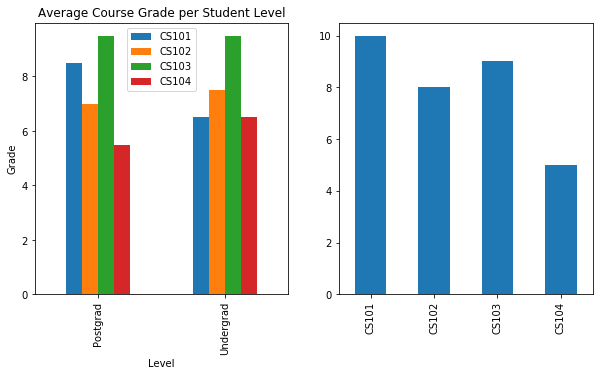

In [41]:
import matplotlib.pyplot as plt
# Create a figure
fig = plt.figure()
# Add a subplot to the figure
ax1 = fig.add_subplot(1, 2, 1)
# Configure plot
ax1.set_title('Average Course Grade per Student Level')
ax1.set_ylabel('Grade')
ax1.set_xlabel('test')
# Visualize the dataframe as a bar plot 
data.plot.bar(ax=ax1, figsize=(10, 5))
# Add a second subplot to the figure
ax2 = fig.add_subplot(1, 2, 2)
# Visualize another dataframe inside the second plot
df.loc[('Postgrad', 'Bob')].plot.bar(ax=ax2, figsize=(10, 5))
